In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [3]:
df_salud_empresa = pd.read_csv ('../files/survey.csv')

# EDA

In [4]:
df_salud_empresa.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [5]:
df_salud_empresa.columns = df_salud_empresa.columns.str.lower()

In [6]:
df_salud_empresa.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df_salud_empresa.shape

(1259, 27)

In [8]:
df_empresa_california =  df_salud_empresa[df_salud_empresa['state']=='CA']
df_empresa_california.tail()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1220,2015-02-21 10:00:50,46,Male,United States,CA,No,Yes,Yes,Often,26-100,No,Yes,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,Yes,Yes,Don't know,No,Yes,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1249,2015-07-22 18:57:54,30,M,United States,CA,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,Don't know,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,No,Yes,Yes,Not sure,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN


In [9]:
df_empresa_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 12 to 1256
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  138 non-null    object
 1   age                        138 non-null    int64 
 2   gender                     138 non-null    object
 3   country                    138 non-null    object
 4   state                      138 non-null    object
 5   self_employed              137 non-null    object
 6   family_history             138 non-null    object
 7   treatment                  138 non-null    object
 8   work_interfere             117 non-null    object
 9   no_employees               138 non-null    object
 10  remote_work                138 non-null    object
 11  tech_company               138 non-null    object
 12  benefits                   138 non-null    object
 13  care_options               138 non-null    object
 14  wellness_prog

In [10]:
df_empresa_california['self_employed'].isnull().sum()

1

In [11]:
df_empresa_california['self_employed']=df_empresa_california['self_employed'].fillna('Unknown')

In [12]:
df_empresa_california.isnull().sum()

timestamp                      0
age                            0
gender                         0
country                        0
state                          0
self_employed                  0
family_history                 0
treatment                      0
work_interfere                21
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     122
dtype: int64

In [13]:
df_empresa_california['work_interfere'].value_counts()

work_interfere
Sometimes    59
Never        20
Rarely       19
Often        19
Name: count, dtype: int64

In [14]:
df_empresa_california.describe(include=object).T

,count,unique,top,freq
timestamp,138,138,2014-08-27 11:33:23,1
gender,138,15,Male,49
country,138,1,United States,138
state,138,1,CA,138
self_employed,138,3,No,127
family_history,138,2,No,70
treatment,138,2,Yes,86
work_interfere,117,4,Sometimes,59
no_employees,138,6,More than 1000,68
remote_work,138,2,No,118


In [15]:
df_empresa_california['work_interfere']=df_empresa_california['work_interfere'].fillna('Unknown')

In [16]:
df_empresa_california.isnull().sum()

timestamp                      0
age                            0
gender                         0
country                        0
state                          0
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     122
dtype: int64

In [17]:
df_empresa_california.duplicated().sum()

0

In [18]:
for column in df_empresa_california.columns:
    
    datos = df_empresa_california[column].value_counts()
    datos = datos.reset_index()

    display (datos)

,timestamp,count
0,2014-08-27 11:33:23,1
1,2014-08-28 11:29:20,1
2,2014-08-28 02:49:34,1
3,2014-08-28 03:36:10,1
4,2014-08-28 05:14:28,1
...,...,...
133,2014-08-27 14:53:11,1
134,2014-08-27 14:52:44,1
135,2014-08-27 14:47:28,1
136,2014-08-27 14:47:10,1


,age,count
0,26,10
1,35,10
2,25,10
3,33,9
4,32,8
5,27,8
6,29,7
7,31,7
8,30,7
9,28,6


,gender,count
0,Male,49
1,M,23
2,male,17
3,Female,15
4,female,10
5,F,10
6,m,4
7,f,3
8,non-binary,1
9,Nah,1


,country,count
0,United States,138


,state,count
0,CA,138


,self_employed,count
0,No,127
1,Yes,10
2,Unknown,1


,family_history,count
0,No,70
1,Yes,68


,treatment,count
0,Yes,86
1,No,52


,work_interfere,count
0,Sometimes,59
1,Unknown,21
2,Never,20
3,Rarely,19
4,Often,19


,no_employees,count
0,More than 1000,68
1,6-25,19
2,26-100,18
3,100-500,17
4,1-5,10
5,500-1000,6


,remote_work,count
0,No,118
1,Yes,20


,tech_company,count
0,Yes,130
1,No,8


,benefits,count
0,Yes,84
1,Don't know,42
2,No,12


,care_options,count
0,Yes,54
1,No,44
2,Not sure,40


,wellness_program,count
0,No,69
1,Yes,36
2,Don't know,33


,seek_help,count
0,Don't know,49
1,No,46
2,Yes,43


,anonymity,count
0,Don't know,97
1,Yes,40
2,No,1


,leave,count
0,Don't know,77
1,Somewhat easy,20
2,Very easy,19
3,Somewhat difficult,14
4,Very difficult,8


,mental_health_consequence,count
0,Maybe,57
1,No,47
2,Yes,34


,phys_health_consequence,count
0,No,103
1,Maybe,28
2,Yes,7


,coworkers,count
0,Some of them,91
1,No,28
2,Yes,19


,supervisor,count
0,Yes,48
1,No,46
2,Some of them,44


,mental_health_interview,count
0,No,123
1,Maybe,14
2,Yes,1


,phys_health_interview,count
0,No,64
1,Maybe,62
2,Yes,12


,mental_vs_physical,count
0,Don't know,58
1,Yes,41
2,No,39


,obs_consequence,count
0,No,122
1,Yes,16


,comments,count
0,Relatively new job. Ask again later,1
1,In small startups it is very hard to keep ment...,1
2,Don't know because I haven't checked not becau...,1
3,Regardless of a stated lack of negative conseq...,1
4,I'm troubled by the way that our hiring proces...,1
5,I talked to a psychiatrist once about taking m...,1
6,Now at starutp. Previously worked at big tech...,1
7,I currently have the best managers I've ever w...,1
8,I'm not aware of anyone with mental health iss...,1
9,Mental health issue I have dealt with: acute d...,1


In [19]:
df_empresa_california['gender'].isnull().sum()

0

In [20]:
df_empresa_california['gender'].value_counts()

gender
Male              49
M                 23
male              17
Female            15
female            10
F                 10
m                  4
f                  3
non-binary         1
Nah                1
Female             1
Woman              1
Make               1
Female (trans)     1
Female (cis)       1
Name: count, dtype: int64

In [21]:
gender_map = {
    'm': 'male',
    'Male':'male',
    'male': 'male',
    'Make': 'male',
    'M':'male',
    
    'f': 'female',
    'F': 'female',
    'female': 'female',
    'Female':'female',
    'female (trans)': 'female',
    'female (cis)': 'female',
    'Woman': 'female',
    
    'nah': 'other',
    'non-binary': 'other',
    
}

df_salud_empresa['gender_cleaned'] = df_salud_empresa['gender'].map(gender_map)

In [22]:
df_salud_empresa['gender_cleaned'].nunique()

3

In [23]:
df_salud_empresa['gender_cleaned'].value_counts()

gender_cleaned
male      975
female    239
other       1
Name: count, dtype: int64

In [24]:
df_salud_empresa['gender']= df_salud_empresa['gender_cleaned']

In [25]:
df_salud_empresa.head(10)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,gender_cleaned
0,2014-08-27 11:29:31,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,female
1,2014-08-27 11:29:37,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,male
2,2014-08-27 11:29:44,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,male
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,male
4,2014-08-27 11:30:22,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,male
5,2014-08-27 11:31:22,33,male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,male
6,2014-08-27 11:31:50,35,female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,female
7,2014-08-27 11:32:05,39,male,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN,male
8,2014-08-27 11:32:39,42,female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN,female
9,2014-08-27 11:32:43,23,male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,male


In [26]:
df_empresa_california.drop(['timestamp','country','state'],axis=1)

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
12,42,female,Unknown,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
24,33,male,No,Yes,Yes,Rarely,26-100,No,Yes,Yes,Not sure,Don't know,Yes,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
27,35,Female,No,Yes,Yes,Rarely,6-25,Yes,Yes,Yes,Yes,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
65,40,Male,No,Yes,No,Sometimes,More than 1000,Yes,Yes,Yes,Yes,Yes,Yes,Don't know,Don't know,Yes,Maybe,Some of them,No,No,No,No,Yes,NaN
74,33,Male,No,No,No,Never,More than 1000,No,Yes,Don't know,Not sure,Yes,Don't know,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,46,Male,No,Yes,Yes,Often,26-100,No,Yes,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
1236,60,Male,No,No,Yes,Often,More than 1000,Yes,Yes,Don't know,No,Yes,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1249,30,M,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,Don't know,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,30,Male,Yes,Yes,Yes,Often,26-100,No,Yes,Yes,Not sure,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN


In [27]:
df_empresa_california = df_empresa_california.drop(['timestamp','country','state','tech_company'],axis=1)

In [28]:
df_empresa_california.sample(10)

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
84,33,Male,No,Yes,No,Never,More than 1000,No,No,No,No,No,Don't know,Don't know,Yes,No,No,No,No,Maybe,No,No,NaN
374,21,F,No,Yes,Yes,Rarely,26-100,No,Don't know,Not sure,Don't know,No,Don't know,Somewhat easy,Yes,No,Some of them,No,No,Yes,Don't know,No,NaN
353,26,male,No,Yes,Yes,Often,More than 1000,No,Yes,Not sure,Don't know,Yes,Don't know,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN
304,37,F,No,No,Yes,Rarely,More than 1000,No,Yes,Yes,Don't know,Yes,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,NaN
342,27,Male,No,No,No,Sometimes,More than 1000,No,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,Yes,No,No,No,No,Maybe,No,No,Regardless of a stated lack of negative conseq...
571,42,Make,No,No,Yes,Often,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Somewhat easy,Maybe,Maybe,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
24,33,male,No,Yes,Yes,Rarely,26-100,No,Yes,Not sure,Don't know,Yes,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
875,30,m,Yes,Yes,Yes,Sometimes,6-25,Yes,Don't know,Not sure,No,Don't know,Don't know,Very difficult,Yes,No,No,No,No,Maybe,Don't know,No,The main reason for the openness answers are b...
843,35,Male,No,No,No,Sometimes,More than 1000,No,Don't know,Not sure,Yes,Don't know,Don't know,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN
748,35,Male,No,Yes,Yes,Rarely,6-25,No,Yes,Yes,Yes,Yes,Yes,Very easy,No,No,Some of them,Yes,No,No,Yes,No,Since I am the CEO of my startup some of the w...


In [29]:
df_empresa_california = df_empresa_california.applymap(
    lambda x: x.lower().strip() if isinstance(x, str) else x)

In [30]:
df_empresa_california.value_counts()

age  gender        self_employed  family_history  treatment  work_interfere  no_employees    remote_work  benefits    care_options  wellness_program  seek_help   anonymity   leave               mental_health_consequence  phys_health_consequence  coworkers     supervisor    mental_health_interview  phys_health_interview  mental_vs_physical  obs_consequence  comments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [31]:
df_empresa_california.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
12,42,female,unknown,yes,yes,sometimes,26-100,no,yes,yes,no,no,don't know,somewhat difficult,yes,yes,yes,yes,maybe,maybe,no,yes,NaN
24,33,male,no,yes,yes,rarely,26-100,no,yes,not sure,don't know,yes,yes,don't know,no,no,yes,yes,no,yes,don't know,no,relatively new job. ask again later
27,35,female,no,yes,yes,rarely,6-25,yes,yes,yes,don't know,don't know,don't know,don't know,no,no,yes,yes,maybe,maybe,yes,no,NaN
65,40,male,no,yes,no,sometimes,more than 1000,yes,yes,yes,yes,yes,don't know,don't know,yes,maybe,some of them,no,no,no,no,yes,NaN
74,33,male,no,no,no,never,more than 1000,no,don't know,not sure,yes,don't know,don't know,don't know,maybe,no,some of them,some of them,no,maybe,yes,no,NaN


### Normalizamos el conjunto de datos para finalizar

In [32]:
df_empresa_california= df_empresa_california.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)

In [52]:
df_empresa_california.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
12,42,female,unknown,yes,yes,sometimes,26-100,no,yes,yes,no,no,don't know,somewhat difficult,yes,yes,yes,yes,maybe,maybe,no,yes,NaN
24,33,male,no,yes,yes,rarely,26-100,no,yes,not sure,don't know,yes,yes,don't know,no,no,yes,yes,no,yes,don't know,no,relatively new job. ask again later
27,35,female,no,yes,yes,rarely,6-25,yes,yes,yes,don't know,don't know,don't know,don't know,no,no,yes,yes,maybe,maybe,yes,no,NaN
65,40,male,no,yes,no,sometimes,more than 1000,yes,yes,yes,yes,yes,don't know,don't know,yes,maybe,some of them,no,no,no,no,yes,NaN
74,33,male,no,no,no,never,more than 1000,no,don't know,not sure,yes,don't know,don't know,don't know,maybe,no,some of them,some of them,no,maybe,yes,no,NaN


## Columnas relacionadas con la responsabilidad de la empresa:

- benefits – Si la empresa ofrece beneficios de salud mental.

- care_options – Disponibilidad de opciones de cuidado dentro de la empresa.

- wellness_program – Si hay un programa de bienestar activo.

- anonymity – Si se garantiza el anonimato al buscar ayuda.


In [34]:
data_set_respons_empresa = df_empresa_california[['no_employees','benefits','care_options','wellness_program','anonymity']]

In [51]:
data_set_respons_empresa

,no_employees,benefits,care_options,wellness_program,anonymity
12,26-100,yes,yes,no,don't know
24,26-100,yes,not sure,don't know,yes
27,6-25,yes,yes,don't know,don't know
65,more than 1000,yes,yes,yes,don't know
74,more than 1000,don't know,not sure,yes,don't know
...,...,...,...,...,...
1220,26-100,don't know,no,no,don't know
1236,more than 1000,don't know,no,yes,don't know
1249,26-100,yes,yes,don't know,yes
1250,26-100,yes,not sure,yes,don't know


In [54]:
data_set_respons_empresa.describe().T

,count,unique,top,freq
no_employees,138,6,more than 1000,68
benefits,138,3,yes,84
care_options,138,3,yes,54
wellness_program,138,3,no,69
anonymity,138,3,don't know,97


La mayoría de los encuestados (68 de 138) trabajan en empresas con más de 1000 empleados.

84 personas indicaron que sí reciben beneficios.

Solo 54 reportan que tienen opciones de cuidado, lo cual muestra una diferencia respecto a los beneficios generales.

Sorprendentemente, la mayoría (69) dice que no hay un programa de bienestar.

Una gran cantidad (97 personas) no sabe si se respeta el anonimato, lo que podría indicar falta de comunicación clara por parte de la empresa.

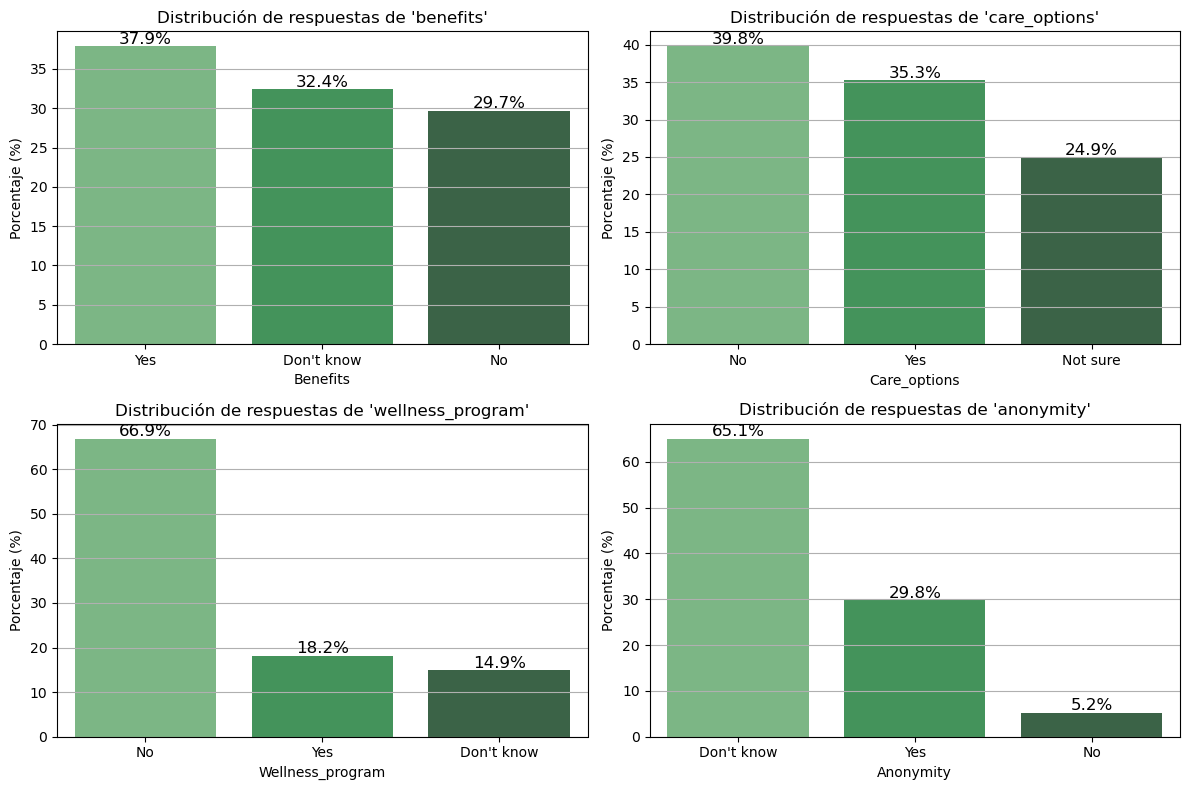

In [64]:
# Lista de columnas
cols = ['benefits', 'care_options', 'wellness_program', 'anonymity']

# Crear una figura para las subgráficas
plt.figure(figsize=(12, 8))

# Graficar cada columna
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)  # Configurar la posición de las subgráficas
    
    # Calcular los porcentajes para cada categoría
    percentages = df_salud_empresa[col].value_counts(normalize=True) * 100
    
    # Graficar los porcentajes
    sns.barplot(x=percentages.index, y=percentages.values, palette='Greens_d')
    
    # Títulos y etiquetas
    plt.title(f"Distribución de respuestas de '{col}'")
    plt.xlabel(col.capitalize())
    plt.ylabel("Porcentaje (%)")
    
    # Mostrar los valores en cada barra
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.grid(axis='y')

# Ajustar el layout
plt.tight_layout()
plt.show()


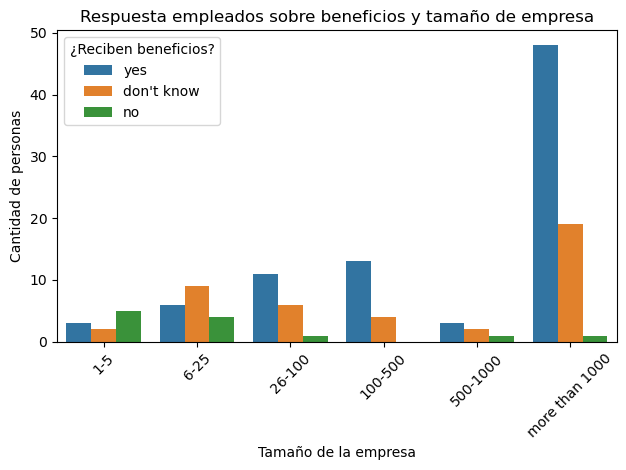

In [72]:
orden_empleados = ["1-5", "6-25", "26-100", "100-500", "500-1000", "more than 1000"]

sns.countplot(data = data_set_respons_empresa, x = 'no_employees', hue = 'benefits', order=orden_empleados)

plt.title("Respuesta empleados sobre beneficios y tamaño de empresa")
plt.xlabel("Tamaño de la empresa")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)
plt.legend(title="¿Reciben beneficios?")
plt.tight_layout()
plt.show()


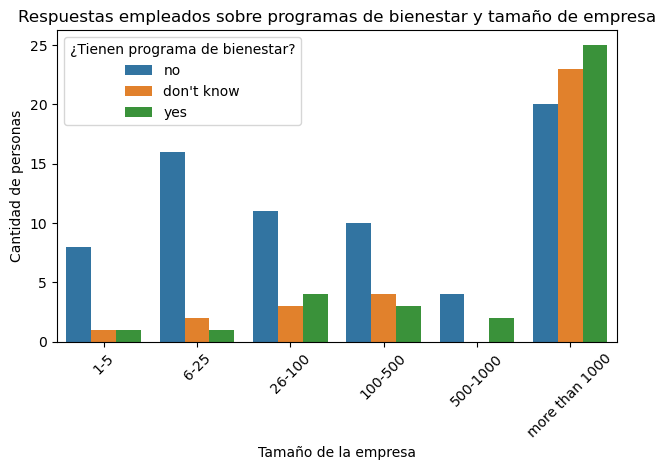

In [71]:
orden_empleados = ["1-5", "6-25", "26-100", "100-500", "500-1000", "more than 1000"]

sns.countplot(data=data_set_respons_empresa, x='no_employees', hue='wellness_program', order=orden_empleados)

plt.title("Respuestas empleados sobre programas de bienestar y tamaño de empresa")
plt.xlabel("Tamaño de la empresa")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)
plt.legend(title="¿Tienen programa de bienestar?")
plt.tight_layout()
plt.show()

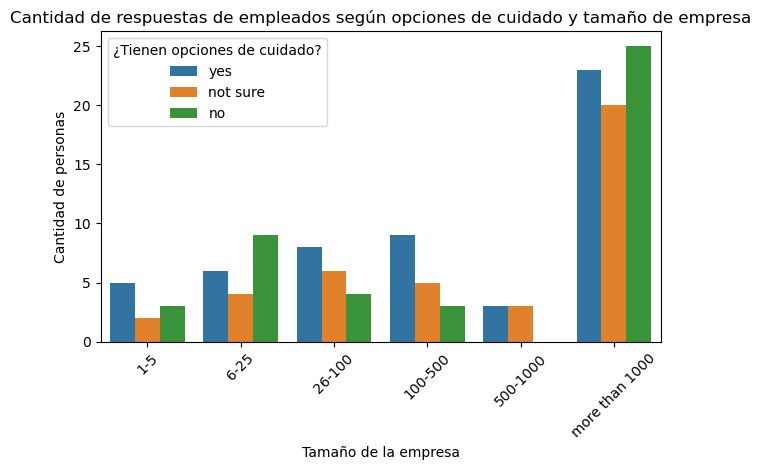

In [73]:
orden_empleados = ["1-5", "6-25", "26-100", "100-500", "500-1000", "more than 1000"]

sns.countplot(data=data_set_respons_empresa, x='no_employees', hue='care_options', order=orden_empleados)

plt.title("Cantidad de respuestas de empleados según opciones de cuidado y tamaño de empresa")
plt.xlabel("Tamaño de la empresa")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)
plt.legend(title="¿Tienen opciones de cuidado?")
plt.tight_layout()
plt.show()

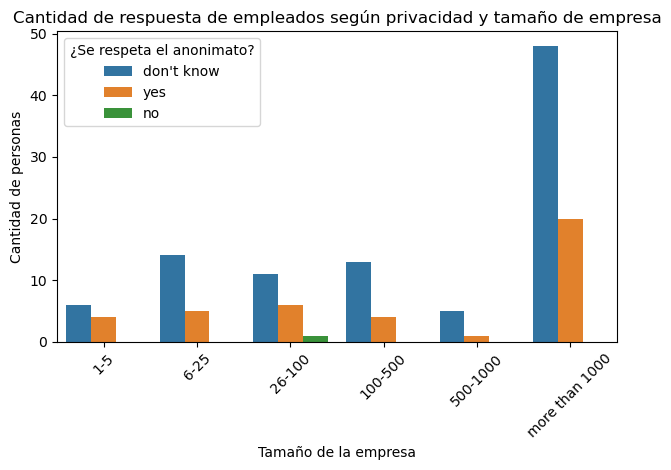

In [74]:
orden_empleados = ["1-5", "6-25", "26-100", "100-500", "500-1000", "more than 1000"]

sns.countplot(data=data_set_respons_empresa, x='no_employees', hue='anonymity', order=orden_empleados)

plt.title("Cantidad de respuesta de empleados según privacidad y tamaño de empresa")
plt.xlabel("Tamaño de la empresa")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)
plt.legend(title="¿Se respeta el anonimato?")
plt.tight_layout()
plt.show()


----------------------------------------------------------------------------------------------------------

In [44]:
for col in ['benefits', 'care_options', 'wellness_program', 'anonymity']:
    tc = pd.crosstab(df_empresa_california['leave'], df_empresa_california[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:", tc, "..................................")

'Tabla de frecuencia/proporciones para benefits:'

benefits,don't know,no,yes
leave,,,
don't know,19.565217,3.623188,32.608696
somewhat difficult,2.898551,0.724638,6.521739
somewhat easy,2.898551,0.724638,10.869565
very difficult,2.173913,1.449275,2.173913
very easy,2.898551,2.173913,8.695652


'..................................'

'Tabla de frecuencia/proporciones para care_options:'

care_options,no,not sure,yes
leave,,,
don't know,23.913043,17.391304,14.492754
somewhat difficult,2.173913,2.898551,5.072464
somewhat easy,2.898551,3.623188,7.971014
very difficult,0.724638,1.449275,3.623188
very easy,2.173913,3.623188,7.971014


'..................................'

'Tabla de frecuencia/proporciones para wellness_program:'

wellness_program,don't know,no,yes
leave,,,
don't know,15.217391,28.985507,11.594203
somewhat difficult,0.000000,7.971014,2.173913
somewhat easy,4.347826,4.347826,5.797101
very difficult,0.724638,5.072464,0.000000
very easy,3.623188,3.623188,6.521739


'..................................'

'Tabla de frecuencia/proporciones para anonymity:'

anonymity,don't know,no,yes
leave,,,
don't know,45.652174,0.000000,10.144928
somewhat difficult,7.246377,0.000000,2.898551
somewhat easy,6.521739,0.000000,7.971014
very difficult,4.347826,0.724638,0.724638
very easy,6.521739,0.000000,7.246377


'..................................'

-------------------------------------------------------------------------------

### 'Tabla de frecuencia/proporciones para benefits:'

Conclusión general:

Parece haber una desconexión importante entre las políticas de salud mental que las empresas dicen ofrecer y el conocimiento real que los empleados tienen sobre estas políticas. La comunicación de las opciones de beneficios y permisos relacionados con la salud mental podría ser un área de mejora significativa para muchas organizaciones. Es posible que las empresas estén proporcionando beneficios pero no estén asegurándose de que los empleados estén completamente informados sobre su disponibilidad o accesibilidad.

Además, el hecho de que muchos empleados no sepan si tienen derecho a permisos relacionados con la salud mental o cómo funcionan los beneficios de salud mental podría ser un indicativo de que falta visibilidad o claridad en las políticas internas de la empresa.

### 'Tabla de frecuencia/proporciones para care_options:'

Conclusión general:

Al igual que con la tabla de "benefits", en "care_options" se observa una falta de certeza entre los empleados sobre la existencia de opciones claras de cuidado para problemas de salud mental. La comunicación de las políticas sobre cuidado mental podría mejorarse, ya que una gran cantidad de personas no está segura de si existen o no estas opciones.

### 'Tabla de frecuencia/proporciones para wellness_program:'

Existe una tendencia a que las personas que perciben que tomar un permiso es "very easy" o "somewhat easy" (relativamente fácil) también respondan afirmativamente (con un "yes") en relación con la existencia del programa de bienestar. Esto podría indicar que los programas de bienestar en esas empresas están más desarrollados y son reconocidos por los empleados, lo que facilita el acceso a permisos.

Aquellos que perciben los permisos como "very difficult" (muy difíciles) o "somewhat difficult" (algo difíciles) parecen tener una relación menos clara con la existencia del programa de bienestar. En estos casos, la falta de un programa claro o la falta de visibilidad del mismo podría ser una barrera para que los empleados utilicen los permisos necesarios para tratar problemas de salud mental.

Conclusión general:

La falta de claridad sobre la existencia de un programa de bienestar en muchas personas sugiere que la comunicación interna de las políticas de bienestar debe mejorar, especialmente en cuanto a la relación entre estos programas y la capacidad de tomar permisos para tratar problemas de salud mental.

### 'Tabla de frecuencia/proporciones para anonymity:'

Conclusión general:

Los empleados que tienen más facilidad para tomar permisos para tratar problemas de salud mental también perciben un mayor nivel de anonimato. Esto sugiere que las empresas que fomentan un ambiente de trabajo que apoya la salud mental, facilitando permisos y garantizando el anonimato, podrían tener una mayor tasa de participación en programas de bienestar y búsqueda de ayuda.

----------------------------------------------------------------------------------------------------------------

## FILTRO DATOS ACORDE AL TAMAÑO DE LA EMPRESA ABC

In [75]:
df_abc = df_empresa_california[df_empresa_california['no_employees']== 'more than 1000']

In [76]:
df_abc.head(10)

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
65,40,male,no,yes,no,sometimes,more than 1000,yes,yes,yes,yes,yes,don't know,don't know,yes,maybe,some of them,no,no,no,no,yes,NaN
74,33,male,no,no,no,never,more than 1000,no,don't know,not sure,yes,don't know,don't know,don't know,maybe,no,some of them,some of them,no,maybe,yes,no,NaN
84,33,male,no,yes,no,never,more than 1000,no,no,no,no,no,don't know,don't know,yes,no,no,no,no,maybe,no,no,NaN
156,27,male,no,yes,yes,sometimes,more than 1000,no,don't know,no,no,don't know,don't know,don't know,no,no,no,some of them,no,maybe,don't know,no,NaN
162,31,m,no,no,no,never,more than 1000,no,yes,no,no,yes,don't know,don't know,no,no,some of them,some of them,no,no,don't know,no,NaN
183,45,m,no,no,yes,sometimes,more than 1000,no,don't know,not sure,don't know,don't know,don't know,don't know,yes,yes,some of them,some of them,no,no,don't know,no,NaN
189,35,female,no,yes,yes,never,more than 1000,no,yes,not sure,don't know,no,yes,somewhat easy,maybe,no,no,no,no,no,don't know,no,NaN
197,26,male,no,no,no,rarely,more than 1000,no,yes,no,no,no,yes,somewhat easy,no,no,some of them,yes,no,maybe,no,no,NaN
291,35,male,no,no,no,never,more than 1000,no,don't know,no,no,don't know,don't know,don't know,yes,maybe,some of them,some of them,no,no,don't know,no,NaN
293,32,male,no,no,no,never,more than 1000,no,yes,no,no,don't know,don't know,don't know,maybe,no,some of them,some of them,no,no,don't know,no,NaN


In [77]:
df_abc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 65 to 1256
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        68 non-null     int64 
 1   gender                     68 non-null     object
 2   self_employed              68 non-null     object
 3   family_history             68 non-null     object
 4   treatment                  68 non-null     object
 5   work_interfere             68 non-null     object
 6   no_employees               68 non-null     object
 7   remote_work                68 non-null     object
 8   benefits                   68 non-null     object
 9   care_options               68 non-null     object
 10  wellness_program           68 non-null     object
 11  seek_help                  68 non-null     object
 12  anonymity                  68 non-null     object
 13  leave                      68 non-null     object
 14  mental_health_

In [ ]:
df_abc.isnull().sum()

age                           0
gender                        0
self_employed                 0
family_history                0
treatment                     0
work_interfere                0
no_employees                  0
remote_work                   0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
comments                     65
dtype: int64

In [80]:
df_abc['comments'].value_counts()

comments
don't know because i haven't checked not because it's difficult to find out. if you didn't have the don't know option i would've looked up the answer.                                                                                                                     1
regardless of a stated lack of negative consequences for discussing mental health issues with coworkers/superiors unconscious bias is a very real thing - as long as i don't *need* to inform my co-workers my mental health issues do not need to be public knowledge.    1
mental health issue i have dealt with: acute depression                                                                                                                                                                                                                    1
Name: count, dtype: int64

In [83]:
df_abc.select_dtypes(include='object').describe().T

,count,unique,top,freq
gender,68,6,male,40
self_employed,68,2,no,67
family_history,68,2,no,39
treatment,68,2,yes,37
work_interfere,68,5,sometimes,29
no_employees,68,1,more than 1000,68
remote_work,68,2,no,64
benefits,68,3,yes,48
care_options,68,3,no,25
wellness_program,68,3,yes,25


### Relación entre beneficios y empleados en tratamiento

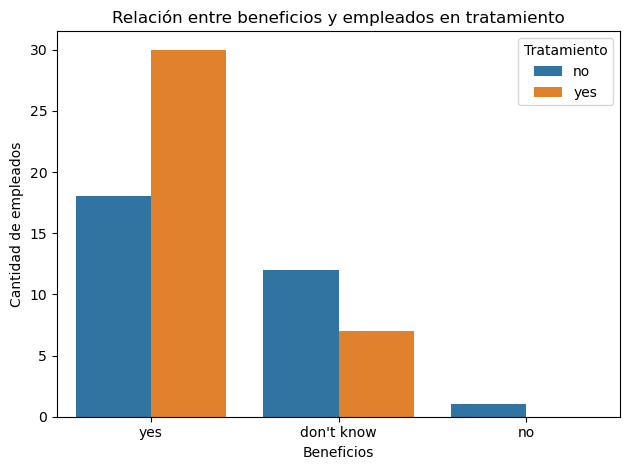

In [85]:
# Ejemplo de gráfico de barras apiladas para "mental_health_consequence" y "benefits"
sns.countplot(data=df_abc, x='benefits', hue='treatment')

plt.title("Relación entre beneficios y empleados en tratamiento")
plt.xlabel("Beneficios")
plt.ylabel("Cantidad de empleados")
plt.legend(title="Tratamiento")
plt.tight_layout()
plt.show()

### Distribución de empleados que buscan ayuda según salud mental

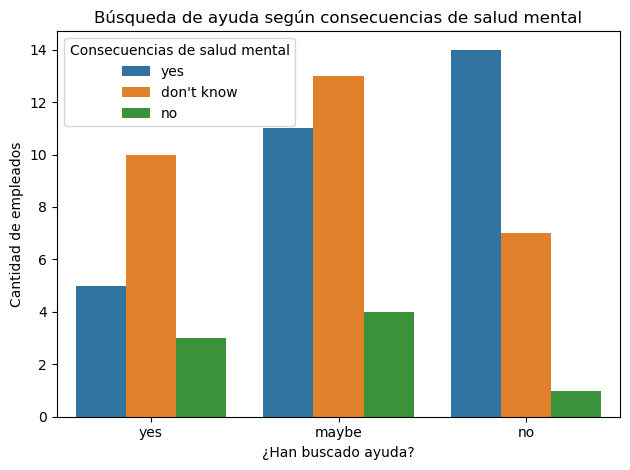

In [89]:
sns.countplot(data=df_abc, x='mental_health_consequence', hue='seek_help')

plt.title("Búsqueda de ayuda según consecuencias de salud mental")
plt.xlabel("¿Han buscado ayuda?")
plt.ylabel("Cantidad de empleados")
plt.legend(title="Consecuencias de salud mental")
plt.tight_layout()
plt.show()

### Distribución de las consecuencias en el entorno laboral si hablamos de nuestra salud mental y si se respeta el anonimato

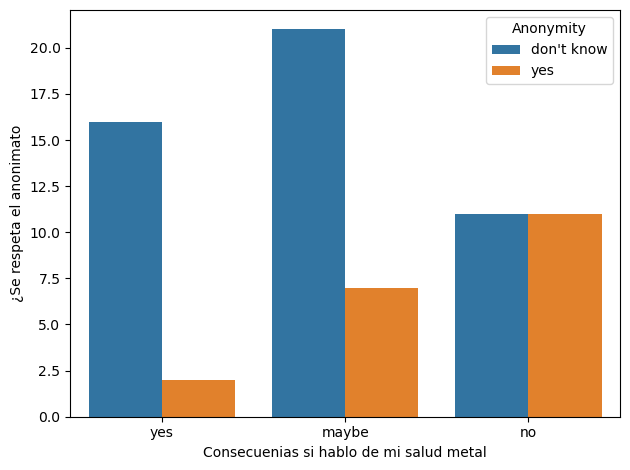

In [ ]:
sns.countplot(data=df_abc, x='mental_health_consequence', hue='anonymity')

plt.xlabel("Consecuenias si hablo de mi salud metal")
plt.ylabel("¿Se respeta el anonimato?")
plt.legend(title="Anonymity")
plt.tight_layout()
plt.show()

### Distribución de la participación en programas de bienestar según consecuencias de salud mental

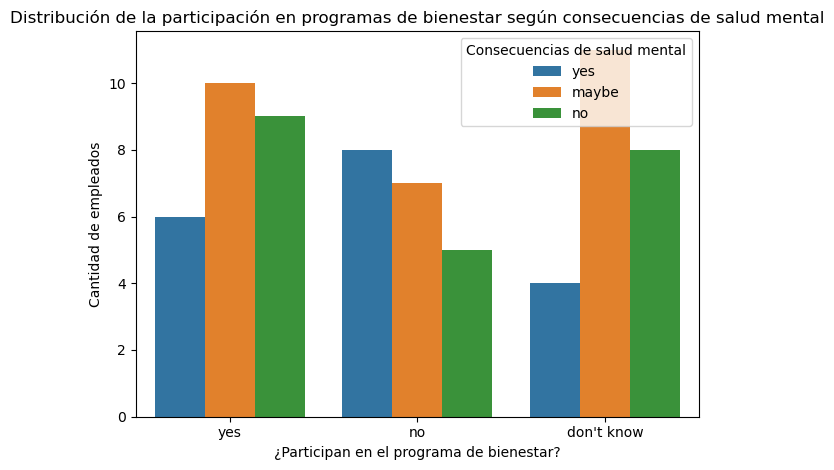

In [ ]:
sns.countplot(data=df_abc, x='wellness_program', hue='treatment')

plt.title("Distribución de la participación en programas de bienestar según consecuencias de salud mental")
plt.xlabel("¿Conocen el programa de bienestarde su empresa?")
plt.ylabel("Cantidad de empleados")
plt.legend(title="Consecuencias de salud mental")
plt.tight_layout()
plt.show()